# About Tutor

Abdullah Ghifari - Data Scientist at Telkomsel 

# Library and Data Preparation

Panggil data `mpg.csv` dan siapkan library `numpy` dan `pandas`

In [1]:
import pandas as pd
import numpy as np

In [3]:
mpg = pd.read_csv('mpg.csv')

lihat informasi dari data yang kita miliki gunakan
* `.head()`
* `.info()`

In [4]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [5]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


# Getting Started

Dalam melakukan visualisasi salah satu library yang paling sering digunakan adalah seaborn. 

Panggil library `seaborn` dan alias yang biasa digunakan adalah `sns`

Tampilkan sebuah visualisasi scatterplot untuk yang pertama kalinya

In [6]:
import seaborn as sns

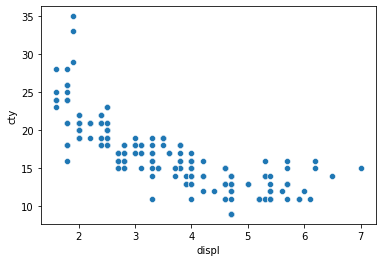

In [9]:
sns.scatterplot(x = mpg['displ'],
                y = mpg['cty'])

Adapun library lain yang perlu disiapkan adalah `matplotlib.pyplot` alias `plt`.

Matplotlib menampilkan gambar yang berbeda dibandingkan dengan seaborn. Karena seaborn sangat mudah digunakan kita akan menggunakan seaborn di sesi pertama ini.

In [10]:
import matplotlib.pyplot as plt

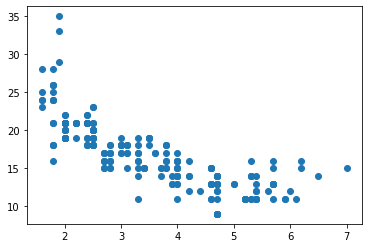

In [11]:
plt.scatter(x = mpg['displ'],
            y = mpg['cty'])

## Challenge #1

Tampilkan scatter plot untuk melihat jumlah cylinder (`cyl`) dan konsumsi bahan bakarnya di dalam kota (`cty`)

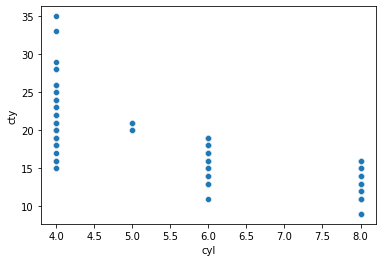

In [12]:
## Gizka

sns.scatterplot(x = mpg['cyl'],
                y = mpg['cty'])


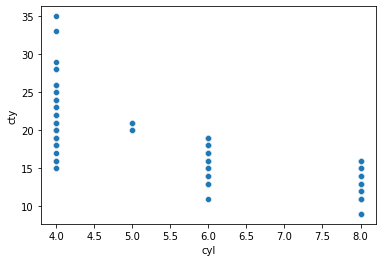

In [13]:
## Jahdu 

sns.scatterplot(x = mpg['cyl'], 
                y = mpg['cty'])


# Categorical Data

Untuk menampilkan visualisasi terhadap data kategorik kita dapat menggunakan `sns.barplot`.

Namun dalam proses menampilkan visualisasi, terkadang kita perlu meng`construct` (melakukan preprocessing) terhadap data terlebih dahulu.

Sehingga data mampu divisualisasikan menggunakan fungsi yang ada pada library seaborn

In [15]:
# construct a dataset
manufacturer_count = mpg.groupby(['manufacturer'],as_index=False).size()

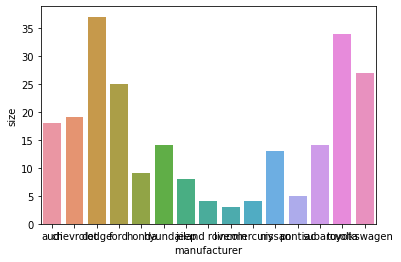

In [17]:
sns.barplot(x = manufacturer_count['manufacturer'], # minimal 1 numerik dan 1 kategorik
            y = manufacturer_count['size']) 

Menampilkan barchart sehingga bentuknya tersusun dari yang paling besar ke paling kecil.

Gunakan `.sort_values` ketika preprocess datanya.

In [20]:
# construct a dataset
manufacturer_count = mpg.groupby(['manufacturer'],as_index=False).size()
manufacturer_count = manufacturer_count.sort_values(['size'], ascending=False)

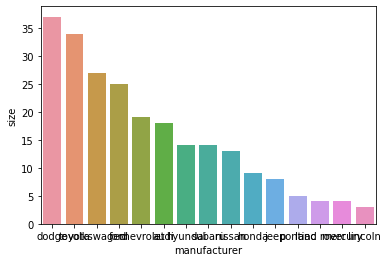

In [22]:
sns.barplot(x = manufacturer_count['manufacturer'], # minimal 1 numerik dan 1 kategorik
            y = manufacturer_count['size']) 

Menampilkan barchart secara horizontal.

Ubah susunan x dan y nya

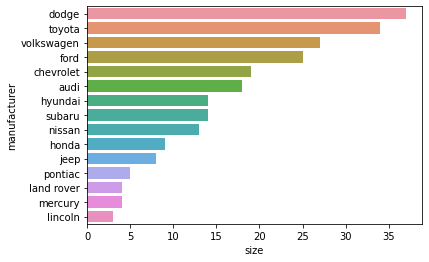

In [23]:
sns.barplot(x = manufacturer_count['size'], # minimal 1 numerik dan 1 kategorik
            y = manufacturer_count['manufacturer']) 

## Challenge #2

Visualisasikan barchart dengan kategori apakah suatu kendaraan efisien atau tidak?

Clue:
- jika variable `hwy < 24` maka dapat dikatakan mobil `Inefficient` jika tidak `Efficient`
- gunakan `np.where()` untuk membuat rule di atas

### Saran Jawaban

In [42]:
# Construct a Dataset
mpg['efficiency'] = np.where(mpg['hwy']<24, 'Inefficient', 'Efficient')

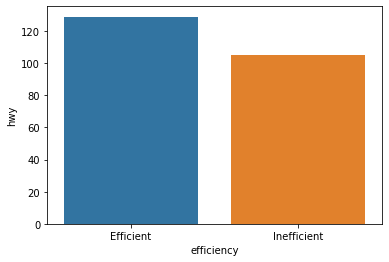

In [43]:
sns.barplot(x = mpg['efficiency'],
            y = mpg['hwy'],
            estimator = len
            )

### Jawaban Teman-teman

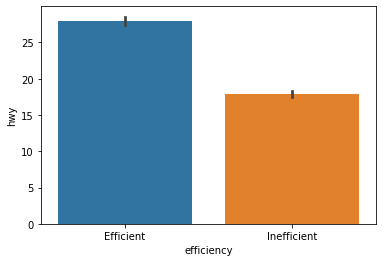

In [49]:
# Gizka
# Rata-rata konsumsi bahan bakar di jalan tol per efficiency category

import numpy as np
mpg['efficiency'] = np.where(mpg['hwy']<24, 'Inefficient', 'Efficient')
sns.barplot(x = mpg['efficiency'],
            y = mpg['hwy'],
            )


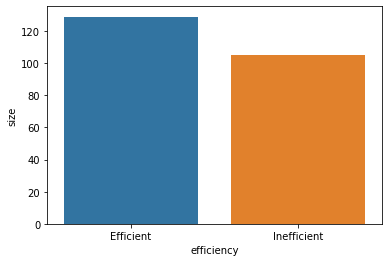

In [35]:
# Willy
# Jumlah mobil yang per kategori efficiency

mpg['efficiency'] = np.where(mpg['hwy']<24, 'Inefficient', 'Efficient')
efficiency_count = mpg.groupby(['efficiency'],as_index=False).size()
efficiency_count = efficiency_count.sort_values(['size'],ascending=False)

sns.barplot(x = efficiency_count['efficiency'],
            y = efficiency_count['size'])
plt.show()


## 'Hue' in Barchart

Kita juga dapat membuat `grouped barchart` untuk menggabungkan kategori lain ke dalam barchart

Coba lihat apakah mobil yang tidak efficient berasal dari kelas tersebut suv atau bukan?

In [45]:
mpg['is_suv'] = np.where(mpg['class']=='suv','SUV','Non-SUV')

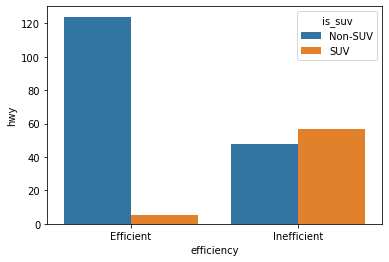

In [48]:
sns.barplot(x = mpg['efficiency'],
            y = mpg['hwy'],
            hue = mpg['is_suv'],
            estimator = len
            )

# Numerical Data

Untuk melihat distribusi sebuah variable numeric kita dapat menggunakan `sns.displot` untuk menampilkan:
1. Histogram
2. KDE plot (density plot)
3. ecdf plot (cumulative plot)
4. Histogram + KDE plot

Untuk pertama kali kita coba tampilkan histogram saja dari variable `cty`

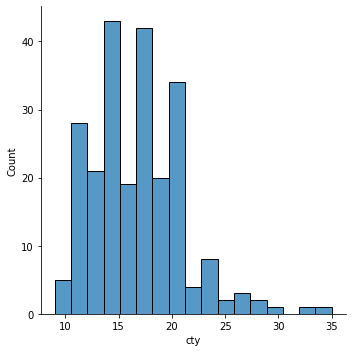

In [50]:
sns.displot(x = mpg['cty'])

tampilkan versi kdenya, dengan menambahkan argument `kind='kde'`

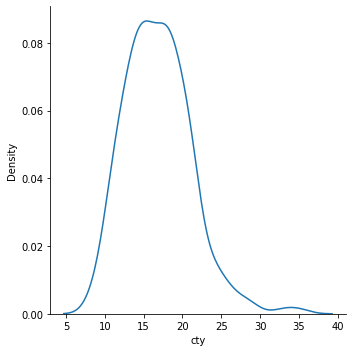

In [53]:
sns.displot(x = mpg['cty'], kind='kde')

Kode untuk histogram dapat menggunakan `kind='hist'`

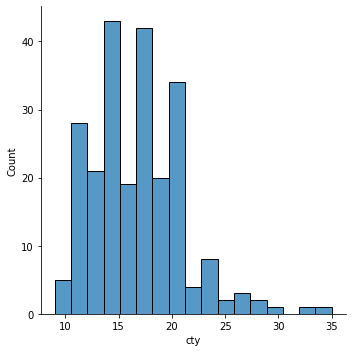

In [54]:
sns.displot(x = mpg['cty'], kind='hist')

Kode untuk menampilkan cumulative distribution dapat menggunakan `kind='ecdf'`

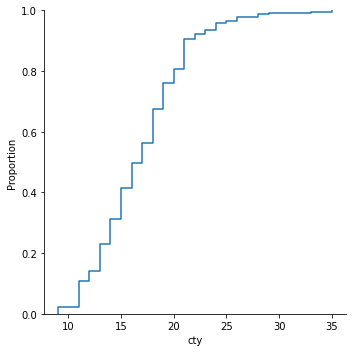

In [55]:
sns.displot(x = mpg['cty'], kind='ecdf')

terkadang kita perlu melihat distribusi sebuah data menggunakan histogram sekaligus kdenya.

Gunakan `kde=True`

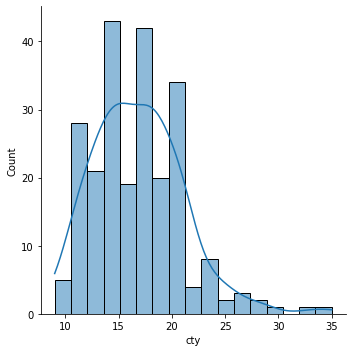

In [56]:
sns.displot(x = mpg['cty'], kde=True)

## Challenge #3

Tampilkan distribusi konsumsi bahan bakar di jalan tol (`hwy`)

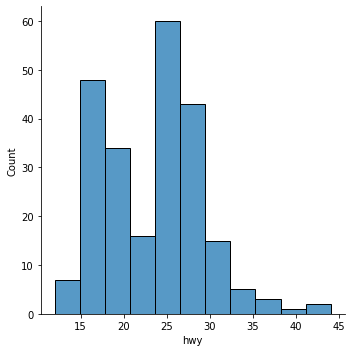

In [74]:
sns.displot(x = mpg['hwy'])

## 'Hue' in Distribution Plot

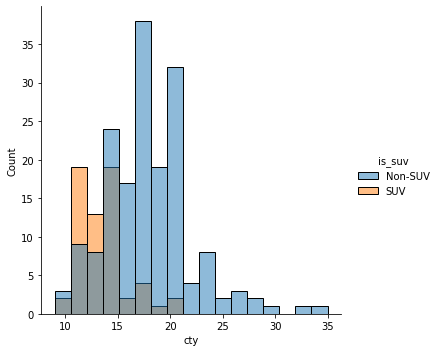

In [57]:
sns.displot(x = mpg['cty'],
            hue = mpg['is_suv'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


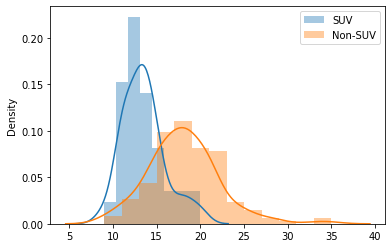

In [63]:
suv = mpg[mpg['is_suv']=='SUV']
non_suv = mpg[mpg['is_suv']!='SUV']

sns.distplot(x = suv['cty'], label='SUV')
sns.distplot(x = non_suv['cty'], label='Non-SUV')
plt.legend()

# Numerical x Categorical Data

Untuk menampilkan variable kategori dan numerik sekaligus kita dapat menggunakan visualisasi bernama boxplot.

Di dalam python gunakan `sns.boxplot()` untuk menampilkan grafik tersebut

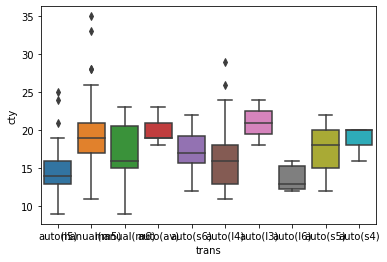

In [64]:
sns.boxplot(x = mpg['trans'],
            y = mpg['cty'])

Di Indonesia biasanya dipermudah dengan istilah mobil matic atau manual. Kita ingin menyederhanakan variable `trans` menjadi `simple_trans`.

Gunakan method `.apply` untuk membuat variable baru tersebut

In [65]:
# Construct data
def is_auto(trans):
    if 'auto' in trans:
        return 'Automatic'
    else:
        return 'Manual'

In [66]:
mpg['simple_trans'] = mpg['trans'].apply(is_auto)
mpg['simple_trans'].value_counts()

Automatic    157
Manual        77
Name: simple_trans, dtype: int64

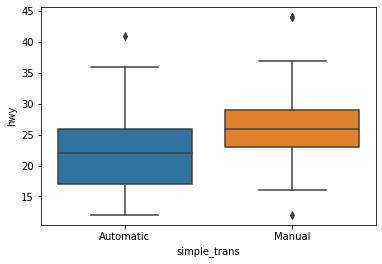

In [69]:
sns.boxplot(x = mpg['simple_trans'],
            y = mpg['hwy'])

## Challenge #4

Sebelumnya kita sudah membuat variable `is_suv`. Sekarang coba kita lihat bagaimana distribusi kendaraan suv untuk konsumsi bahan bakar didalam kota (`cty`).

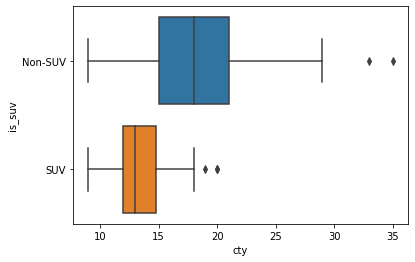

In [76]:
sns.boxplot(x = mpg['cty'],
            y = mpg['is_suv'])

# Numerical x Numerical Data

Untuk melihat distribusi 2 variable numerik kita dapat menggunakan scatterplot.

Sama seperti visualisasi pertama kali gunakan `sns.scatterplot` untuk menampilkan grafik tersebut.

Coba tampilkan cc (`displ`) dan konsumsi bahan bakar dalam kota (`cty`) dari seluruh mobil

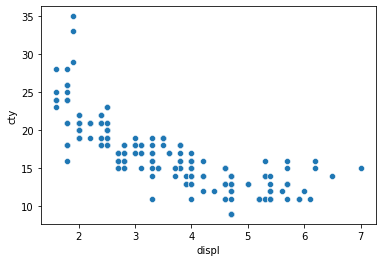

In [70]:
sns.scatterplot(x = mpg['displ'], y = mpg['cty'])

## 'Hue' in Seaborn

Untuk menampilkan scatterplot berdasarkan sebuah kelompok dapat menggunakan argumen `hue`

Tambahkan cylinder (`cyl`) ke dalam scatterplot

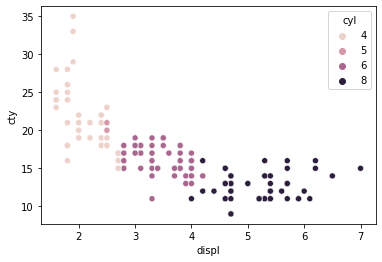

In [71]:
sns.scatterplot(x = mpg['displ'], 
                y = mpg['cty'],
                hue = mpg['cyl']
                )

coba lihat distribusi berdasarkan kategori `class` nya

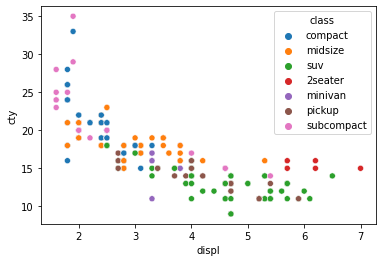

In [72]:
sns.scatterplot(x = mpg['displ'], 
                y = mpg['cty'],
                hue = mpg['class']
                )

## Challenge #5

Karena tampilan dari kategori `class` kurang begitu kelihatan. Coba tampilan hanya berdasarkan kategori `is_suv`.

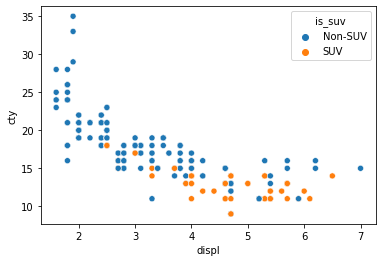

In [73]:
sns.scatterplot(x = mpg['displ'], 
                y = mpg['cty'],
                hue = mpg['is_suv']
                )